In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Read csv data file, change to your location
df = pd.read_csv("Iris.csv")

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


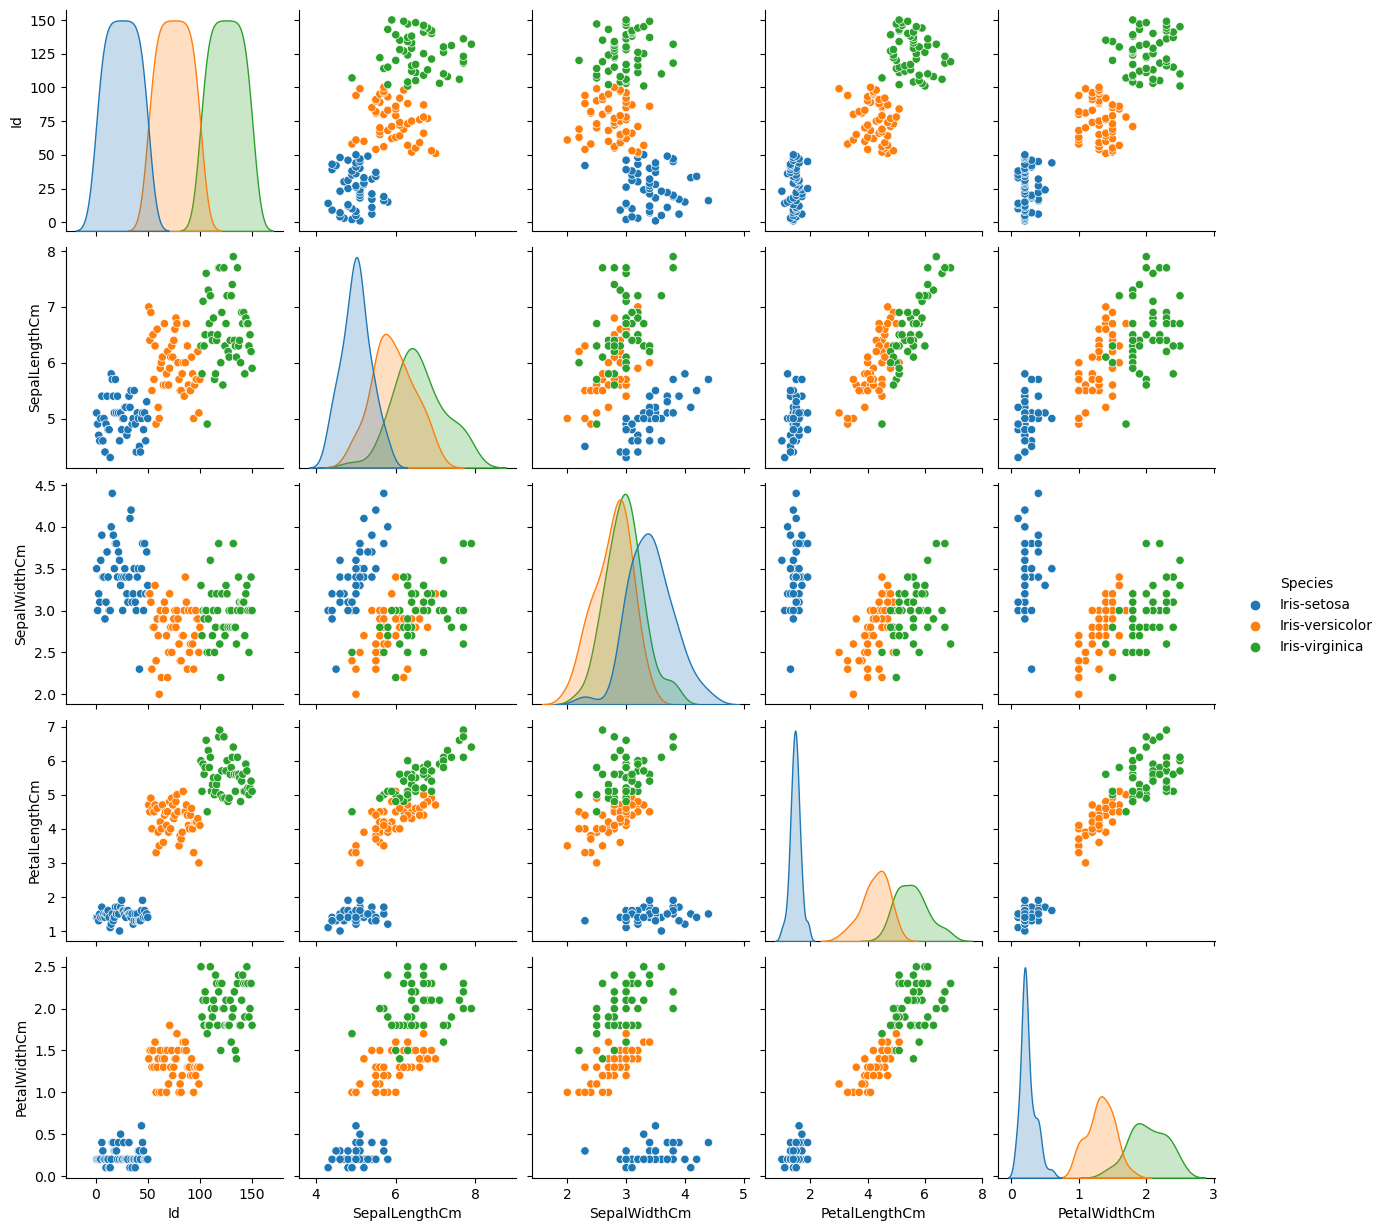

In [14]:
# show data information
df
df.describe()
sns.pairplot(df, hue = 'Species')

Text(0.5, 1.0, 'Correlation matrix')

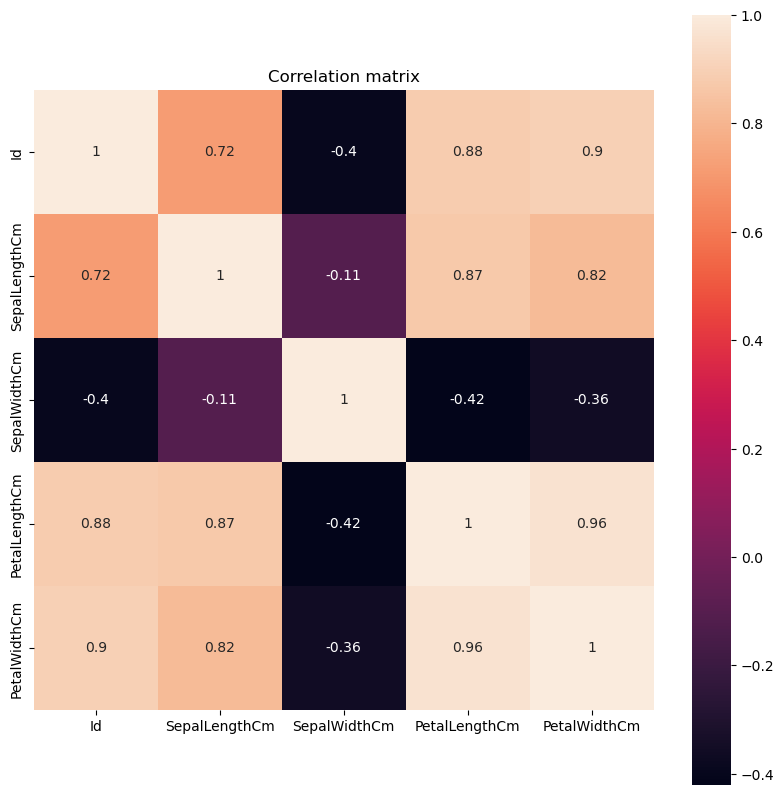

In [15]:
# We're seperating the species column
species = df["Species"].tolist()
X = df.drop("Species", axis=1)
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

In [16]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
# method2
np.linalg.eig(X_corr)

(array([3.7352665 , 0.92176284, 0.23413122, 0.08823837, 0.02060107]),
 array([[-0.48136016, -0.02275157, -0.67406853,  0.55978662, -0.0067323 ],
        [-0.44844975,  0.38285827,  0.64520569,  0.40999945,  0.26061932],
        [ 0.23195044,  0.92007839, -0.27427786, -0.09491665, -0.12416613],
        [-0.51079205,  0.03074857,  0.13238322, -0.28817343, -0.79848404],
        [-0.5024696 ,  0.07356757, -0.19127876, -0.65305918,  0.52824072]]))

Text(0.5, 0, 'Dimensions')

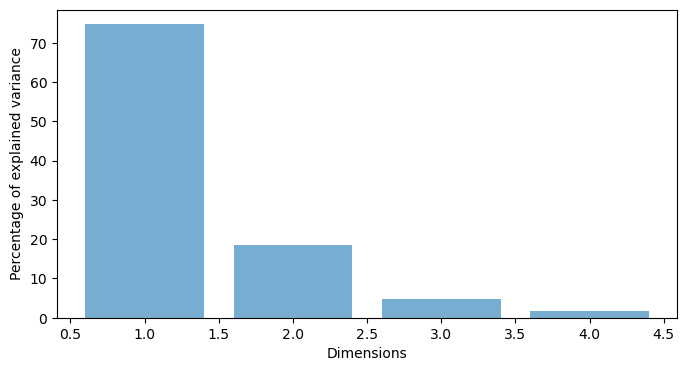

In [19]:
explained_variance = (eig_values / np.sum(eig_values)) * 100
plt.figure(figsize=(8, 4))
plt.bar(range(1, 5), explained_variance[:4], alpha=0.6)  # Use [:4] to select the first 4 elements
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [20]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

In [27]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
        
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
    plot_scatter(pc1, pc2)
    

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Read csv data file, change to your location
df = pd.read_csv("Iris.csv")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop("", 1)
X = StandardScaler().fit_transform(X)
pca = PCA()
result = pca.fit_transform(X)
# Remember what we said about the sign of eigen vectors that might change ?
pc1 = - result[:,0]
pc2 = - result[:,1]
plot_scatter(pc1, pc2)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given